In [10]:
import sys

sys.path.append("../../")
from syntemp.SynUtils.utils import load_from_pickle

## 1. Split data

In [ ]:
# import pandas as pd
# from syntemp.SynUtils.utils import train_val_test_split_df, save_database

# original_data = load_database("../../Data/Temp/data_aam.json.gz")
# original_data = pd.DataFrame(original_data)

# train, test, valid = train_val_test_split_df(original_data, target="class")
# train, test, valid = (
#     train.to_dict("records"),
#     test.to_dict("records"),
#     valid.to_dict("records"),
# )

# save_database(train, "../../Data/Temp/Benchmark/train.json.gz")
# save_database(test, "../../Data/Temp/Benchmark/test.json.gz")
# save_database(valid, "../../Data/Temp/Benchmark/valid.json.gz")

# Count number of templates

In [13]:
raw = load_from_pickle("../../Data/Temp/Benchmark/Raw/templates.pkl.gz")
complete = load_from_pickle("../../Data/Temp/Benchmark/Complete/templates.pkl.gz")
def calculate(data):
    number = []
    for i in range(len(data)):
        number.append(len(data[i]))
    return number


raw_result = calculate(raw)
complete_result = calculate(complete)

print(raw_result)
print(complete_result)

[313, 1577, 9798, 22248]
[311, 1552, 9699, 22104]


# Analyze descriptors

In [15]:
complete = load_from_pickle("../../Data/Temp/Benchmark/Complete/templates.pkl.gz")
data_cluster = load_from_pickle(
    "../../Data/Temp/Benchmark/Complete/data_cluster.pkl.gz"
)
temp_0 = complete[0]

## Template percentage and DPO rule

/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynTemp/Docs/Analysis/_analysis/_plot_analysis.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


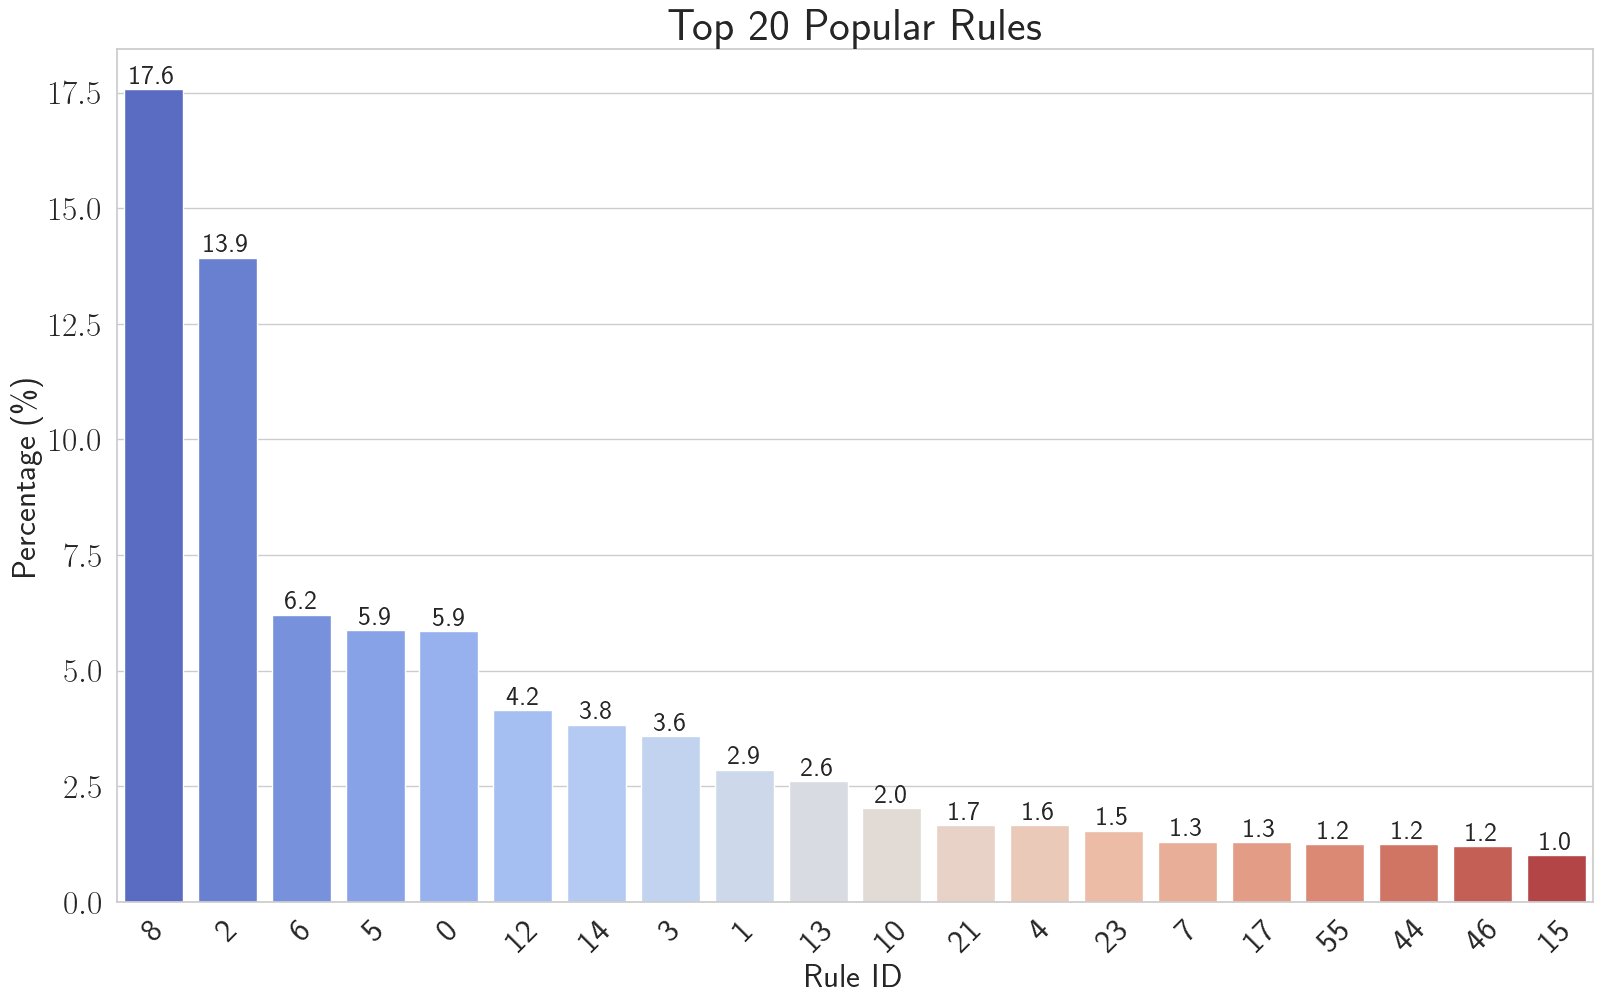

In [17]:
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")


from _analysis._plot_analysis import plot_top_rules_with_seaborn
fig, ax = plt.subplots(figsize=(16, 10))  # Correctly create a figure and an axes object

plot_top_rules_with_seaborn(temp_0, top_n=20, ax=ax)  # Use the ax object correctly
plt.tight_layout(pad=0.5)

plt.savefig(
    "../../Docs/Analysis/fig/FigS2A_rule_distribution.pdf",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

## Descriptors Analysis

In [18]:
from _analysis._plot_analysis import calculate_value_percentage

In [19]:
print(calculate_value_percentage(temp_0, "Reaction Type"))
print(calculate_value_percentage(data_cluster, "Reaction Type"))

{'Elementary': 54.34, 'Complicated': 45.66}
{'Elementary': 86.97, 'Complicated': 13.03}


In [20]:
print(calculate_value_percentage(temp_0, "Topo Type"))
print(calculate_value_percentage(data_cluster, "Topo Type"))

{'Single Cyclic': 48.55, 'Combinatorial Cyclic': 40.84, 'Complex Cyclic': 4.82, 'Acyclic': 5.79}
{'Single Cyclic': 86.57, 'Combinatorial Cyclic': 11.78, 'Complex Cyclic': 1.25, 'Acyclic': 0.4}


In [21]:
print(calculate_value_percentage(temp_0, "Reaction Step"))
print(calculate_value_percentage(data_cluster, "Reaction Step"))

{1: 54.34, 2: 33.12, 3: 7.07, 4: 3.86, 5: 1.29, 6: 0.32}
{1: 86.97, 2: 11.83, 3: 0.35, 4: 0.69, 5: 0.16, 6: 0.0}


In [22]:
acyl = [value for value in temp_0 if value["Topo Type"] == "Acyclic"]
single = [value for value in temp_0 if value["Topo Type"] == "Single Cyclic"]
combo = [value for value in temp_0 if value["Topo Type"] == "Combinatorial Cyclic"]
comp = [value for value in temp_0 if value["Topo Type"] == "Complex Cyclic"]
print("Acyclic", calculate_value_percentage(acyl, "Rings"))
print("Single Cyclic", calculate_value_percentage(single, "Rings"))
print("Combinatorial Cyclic", calculate_value_percentage(combo, "Rings"))
print("Complex Cyclic", calculate_value_percentage(comp, "Rings"))

Acyclic {(0,): 100.0}
Single Cyclic {(4,): 72.19, (6,): 19.21, (5,): 5.96, (7,): 1.99, (8,): 0.66}
Combinatorial Cyclic {(4, 4): 24.41, (3, 3): 1.57, (4, 4, 4): 0.79, (4, 5, 5): 0.79, (3, 5): 8.66, (4, 4, 4, 7): 0.79, (4, 5): 12.6, (4, 5, 6, 6): 0.79, (4, 4, 5, 6): 3.15, (4, 5, 5, 6, 8): 0.79, (4, 6): 17.32, (4, 4, 5): 6.3, (4, 4, 4, 4, 9): 0.79, (6, 6): 1.57, (4, 5, 7): 0.79, (5, 5): 1.57, (5, 5, 6): 0.79, (6, 6, 6): 0.79, (4, 4, 6, 8): 1.57, (5, 7, 7): 0.79, (5, 5, 5): 0.79, (4, 5, 6): 0.79, (4, 4, 5, 7): 0.79, (4, 6, 8): 0.79, (4, 4, 6, 6, 8): 0.79, (4, 7): 1.57, (4, 6, 7, 9): 0.79, (4, 4, 6): 0.79, (6, 7, 7): 0.79, (5, 6, 8, 9): 0.79, (4, 5, 5, 6): 0.79, (4, 4, 4, 5, 7): 0.79, (6, 7): 0.79, (3, 3, 3): 0.79, (5, 7): 0.79, (3, 4): 0.79}
Complex Cyclic {(0, 3): 33.33, (0, 4): 46.67, (0, 4, 4): 13.33, (0, 4, 4, 4, 5, 7): 6.67}


In [23]:
acyl = [value for value in data_cluster if value["Topo Type"] == "Acyclic"]
single = [value for value in data_cluster if value["Topo Type"] == "Single Cyclic"]
combo = [
    value for value in data_cluster if value["Topo Type"] == "Combinatorial Cyclic"
]
comp = [value for value in data_cluster if value["Topo Type"] == "Complex Cyclic"]
print("Acyclic", calculate_value_percentage(acyl, "Rings"))
print("Single Cyclic", calculate_value_percentage(single, "Rings"))
print("Combinatorial Cyclic", calculate_value_percentage(combo, "Rings"))
print("Complex Cyclic", calculate_value_percentage(comp, "Rings"))

Acyclic {(0,): 100.0}
Single Cyclic {(4,): 98.4, (6,): 1.39, (5,): 0.17, (7,): 0.03, (8,): 0.0}
Combinatorial Cyclic {(4, 4): 73.12, (3, 3): 0.96, (4, 4, 4): 0.32, (4, 5, 5): 0.22, (3, 5): 12.37, (4, 4, 4, 7): 1.16, (4, 5): 1.46, (4, 5, 6, 6): 0.1, (4, 4, 5, 6): 0.67, (4, 5, 5, 6, 8): 0.2, (4, 6): 1.16, (4, 4, 7, 7): 0.91, (4, 4, 5): 0.54, (4, 4, 4, 4, 9): 0.1, (6, 6): 0.32, (4, 5, 7): 0.32, (5, 5): 0.07, (6, 7, 7): 0.05, (5, 5, 6): 0.17, (6, 6, 6): 0.07, (4, 4, 4, 5, 7): 0.12, (4, 4, 6, 8): 0.07, (4, 5, 6, 7): 1.78, (4, 4, 6): 0.64, (4, 5, 6): 0.2, (4, 4, 5, 6, 8): 0.3, (4, 4, 5, 7): 0.64, (5, 7, 7): 0.02, (4, 6, 6, 8): 0.12, (5, 5, 5): 0.02, (4, 6, 7): 0.07, (5, 5, 6, 6): 0.27, (4, 4, 4, 4, 7): 0.12, (4, 6, 8): 0.02, (4, 4, 6, 6, 8): 0.02, (4, 7): 0.12, (5, 6): 0.15, (5, 6, 7): 0.05, (4, 6, 7, 9): 0.07, (4, 4, 6, 8, 8): 0.05, (4, 4, 8, 8): 0.02, (4, 4, 5, 5, 8): 0.2, (4, 4, 5, 7, 8): 0.1, (5, 5, 7): 0.1, (5, 6, 8, 9): 0.02, (4, 4, 8, 8, 8): 0.02, (4, 4, 5, 5, 7): 0.07, (4, 5, 5, 6): 

## Descriptors Visualization

### Pie chart

In [24]:
for key, value in enumerate(temp_0):
    if value['Topo Type'] == 'Acyclic':
        temp_0[key]['Topo Type'] = 'Acyclic Graph'
    elif value['Topo Type'] == 'Complex':
        temp_0[key]['Topo Type'] = 'Hybrid Graph'

In [25]:
for key, value in enumerate(data_cluster):
    if value['Topo Type'] == 'Acyclic':
        data_cluster[key]['Topo Type'] = 'Acyclic Graph'
    elif value['Topo Type'] == 'Complex':
        data_cluster[key]['Topo Type'] = 'Hybrid Graph'

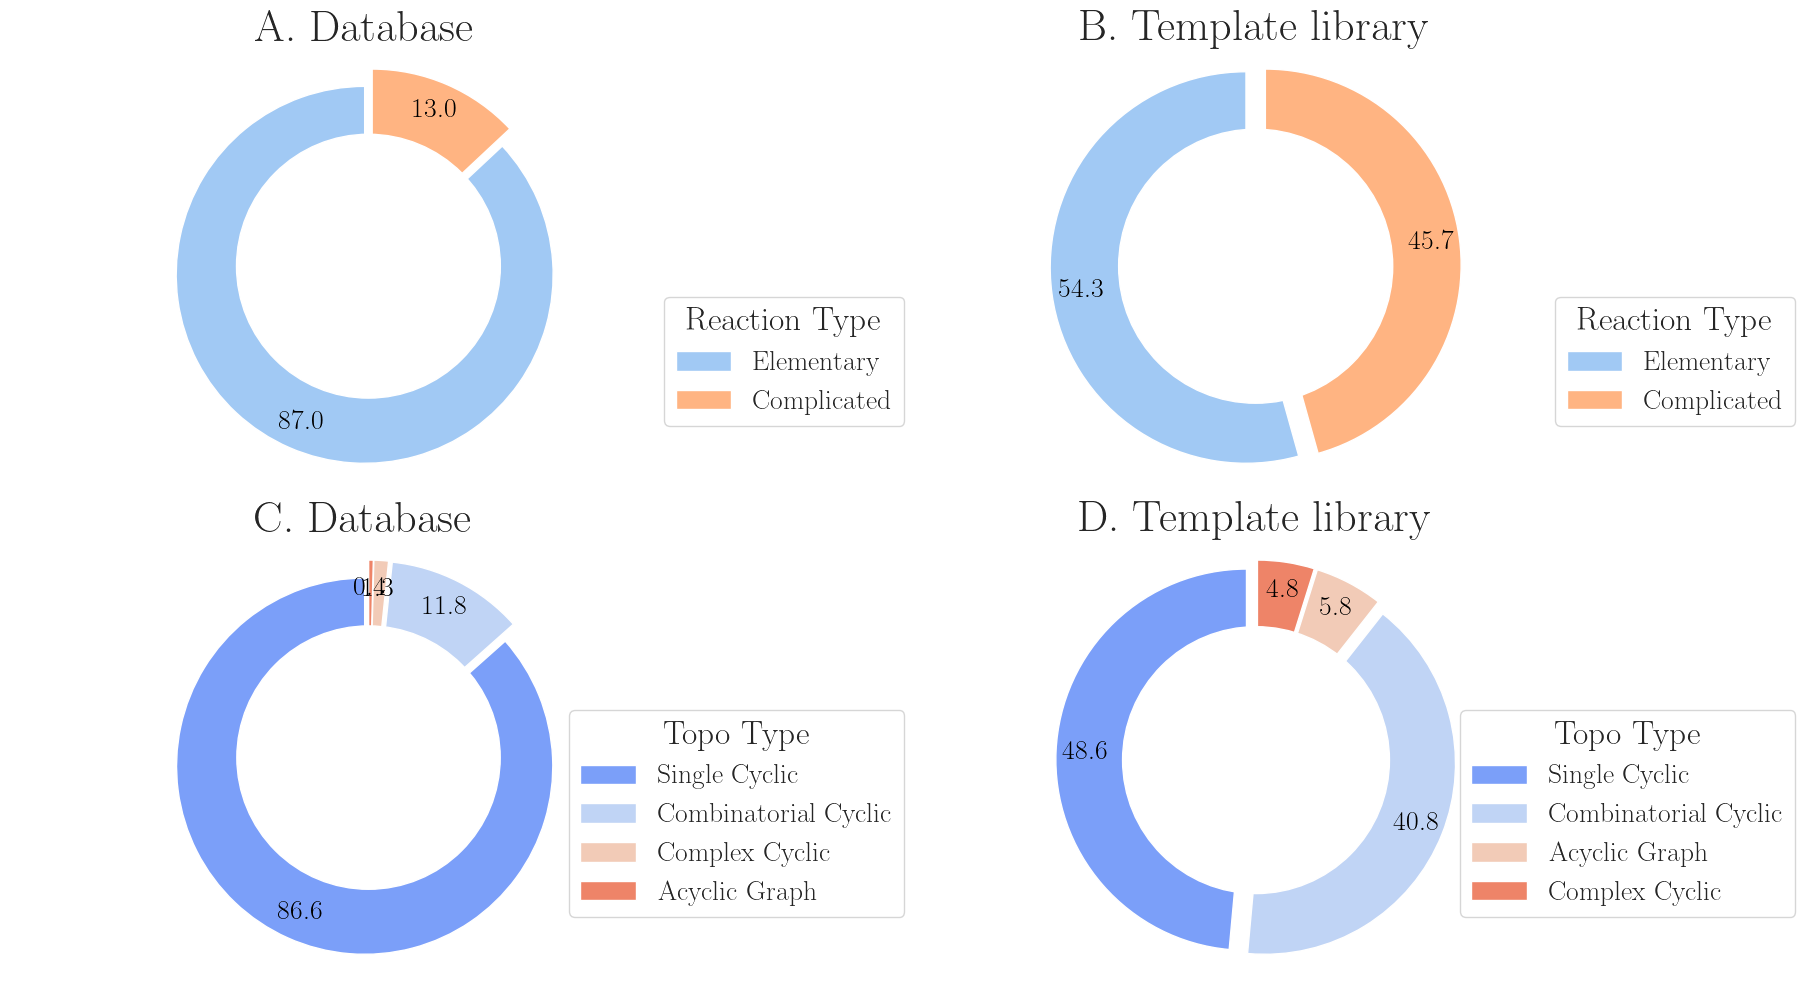

In [27]:
# from _analysis._plot_analysis import create_pie_chart
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def create_pie_chart(data, column, ax=None, title=None, color_pallet="pastel"):
    """
    Generates a pie chart for the specified column from a list of dictionaries.
    Displays percentage labels inside the slices only and category names in an external
    legend without percentages. Allows customization of the plot title, supporting LaTeX
    formatted strings.

    Parameters:
    - data (list of dict): Data to plot.
    - column (str): Column name to plot percentages for.
    - ax (matplotlib.axes.Axes, optional): Matplotlib axis object to plot on.
    - title (str, optional): Title for the pie chart, supports LaTeX formatted strings.

    Returns:
    - matplotlib.axes.Axes: The axis with the pie chart.
    """
    # Enable LaTeX formatting for better quality text rendering
    plt.rc("text", usetex=True)
    plt.rc("font", family="serif")

    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)

    # Calculate percentage
    percentage = df[column].value_counts(normalize=True) * 100

    # Define a color palette using Seaborn
    colors = sns.color_palette(color_pallet, len(percentage))

    # Create pie plot
    if ax is None:
        fig, ax = plt.subplots()

    wedges, texts, autotexts = ax.pie(
        percentage,
        startangle=90,
        colors=colors,
        autopct="%1.1f%%",
        pctdistance=0.85,
        explode=[0.05] * len(percentage),
    )

    # Draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    ax.add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis("equal")

    # Add legend with category names only
    ax.legend(
        wedges,
        [rf"{label}" for label in percentage.index],
        title=column,
        loc="lower right",
        bbox_to_anchor=(0.6, 0.1, 0.68, 1),
        prop={"size": 20},
        title_fontsize=24,
    )  # Set label font size

    # Set title using LaTeX if provided, else default to a generic title
    if title:
        ax.set_title(title, fontsize=32)
    else:
        ax.set_title(f"Pie Chart of {column}", fontsize=32)

    # Enhance the font size and color of the autotexts
    for autotext in autotexts:
        autotext.set_color("black")
        autotext.set_fontsize(20)

    return ax


fig, axs = plt.subplots(2, 2, figsize=(18, 10))  
create_pie_chart(
    temp_0,
    "Reaction Type",
    ax=axs[0, 1],
    title=r"B. Template library",
    color_pallet="pastel",
)

create_pie_chart(
    data_cluster,
    "Reaction Type",
    ax=axs[0, 0],
    title=r"A. Database",
    color_pallet="pastel",
)

create_pie_chart(
    temp_0,
    "Topo Type",
    ax=axs[1, 1],
    title=r"D. Template library",
    color_pallet="coolwarm",
)

create_pie_chart(
    data_cluster,
    "Topo Type",
    ax=axs[1, 0],
    title=r"C. Database",
    color_pallet="coolwarm",
)


plt.tight_layout()
plt.savefig(
    "../../Docs/Analysis/fig/Fig8_Analysis_rtype_topo.pdf",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

### Distribution

In [28]:
from _analysis._plot_analysis import count_column_values

In [29]:
element = [value for value in temp_0 if value["Reaction Type"] in ["Elementary"]]
complex = [value for value in temp_0 if value["Reaction Type"] in ["Complicated"]]
element_count = count_column_values(element, "Rings")
complex_count = count_column_values(complex, "Rings")

In [30]:
element_all = [
    value for value in data_cluster if value["Reaction Type"] in ["Elementary"]
]
complex_all = [
    value for value in data_cluster if value["Reaction Type"] in ["Complicated"]
]
element_count_all = count_column_values(element_all, "Rings")
complex_count_all = count_column_values(complex_all, "Rings")

In [31]:
from typing import *
from matplotlib.axes import Axes
def plot_rules_distribution(
    rules: Dict[str, int],
    rule_type: str = "single",
    ax: Optional[Axes] = None,
    title: Optional[str] = None,
    refinement: bool = False,
    threshold: float = 1,
    remove: bool = True,
    color_pallet: str = "pastel",
) -> None:
    """
    Plots the distribution of rules in a bar chart, optionally combining all entries under
    the threshold into a single category 'Under 1%' if `refinement` is True.

    Parameters:
    - rules (Dict[str, int]): Dictionary with rule counts keyed by rule name,
    where the values are counts.
    - rule_type (str, optional): Specifies the type of rules to plot
    ('single' or 'complex'). Default is 'single'.
    - ax (matplotlib.axes.Axes, optional): Matplotlib axis object to plot on.
    If None, a new figure is created.
    - title (str, optional): Optional title for the chart. If None,
    a default title based on `rule_type` is used.
    - refinement (bool, optional): If True, combines all percentages under
    the threshold into one category 'Under 1%'. Default is False.
    - threshold (float, optional): The percentage threshold under which all
    categories are combined into 'Under 1%' if `refinement` is True. Default is 1.
    - remove (bool, optional): If True, removes the last category from the plot.
    Default is True.
    - color_pallet (str, optional): Color palette to use for the plot.
    Default is 'pastel'.

    Returns:
    - None: The function directly modifies the `ax` object or creates a new plot.
    """
    # Calculate total counts for the rules
    total_rules = sum(rules.values())

    # Convert counts to percentages and optionally combine small values
    if refinement:
        refined_rules = {}
        small_value_aggregate = 0
        for key, value in rules.items():
            percentage = value / total_rules * 100
            if percentage < threshold:
                small_value_aggregate += percentage
            else:
                refined_rules[key] = percentage
        if small_value_aggregate > 0:
            refined_rules["Under 1%"] = small_value_aggregate
        percentages = list(refined_rules.values())
        types_of_rules = list(refined_rules.keys())
        if remove:
            percentages = percentages[:-1]
            types_of_rules = types_of_rules[:-1]
    else:
        percentages = [value / total_rules * 100 for value in rules.values()]
        types_of_rules = list(rules.keys())

    # Set style
    sns.set(style="whitegrid")

    # Enable LaTeX rendering in matplotlib
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"\usepackage{amsmath}")  # Ensure amsmath is loaded

    # Create figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6), dpi=120)

    # Plot the data
    sns.barplot(ax=ax, x=types_of_rules, y=percentages, palette=color_pallet)
    if title:
        ax.set_title(rf"{title}", fontsize=24)
    else:
        ax.set_title(f"Distribution of {rule_type.capitalize()} Rules", fontsize=16)
    ax.set_xlabel("Cycle length", fontsize=18)
    ax.set_ylabel(r"Percentage (\%)", fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # Set font size for x-tick and y-tick labels
    ax.tick_params(axis="x", labelsize=16)
    ax.tick_params(axis="y", labelsize=16)

    # Add text labels above the bars
    for index, value in enumerate(percentages):
        ax.text(
            index, value + 0.5, f"{value:.1f}%", ha="center", va="bottom", fontsize=18
        )

    # Only show plot if ax is not provided (i.e., we created the figure here)
    if ax is None:
        plt.show()

/tmp/ipykernel_2000178/3104729133.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=types_of_rules, y=percentages, palette=color_pallet)
/tmp/ipykernel_2000178/3104729133.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_2000178/3104729133.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=types_of_rules, y=percentages, palette=color_pallet)
/tmp/ipykernel_2000178/3104729133.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoc

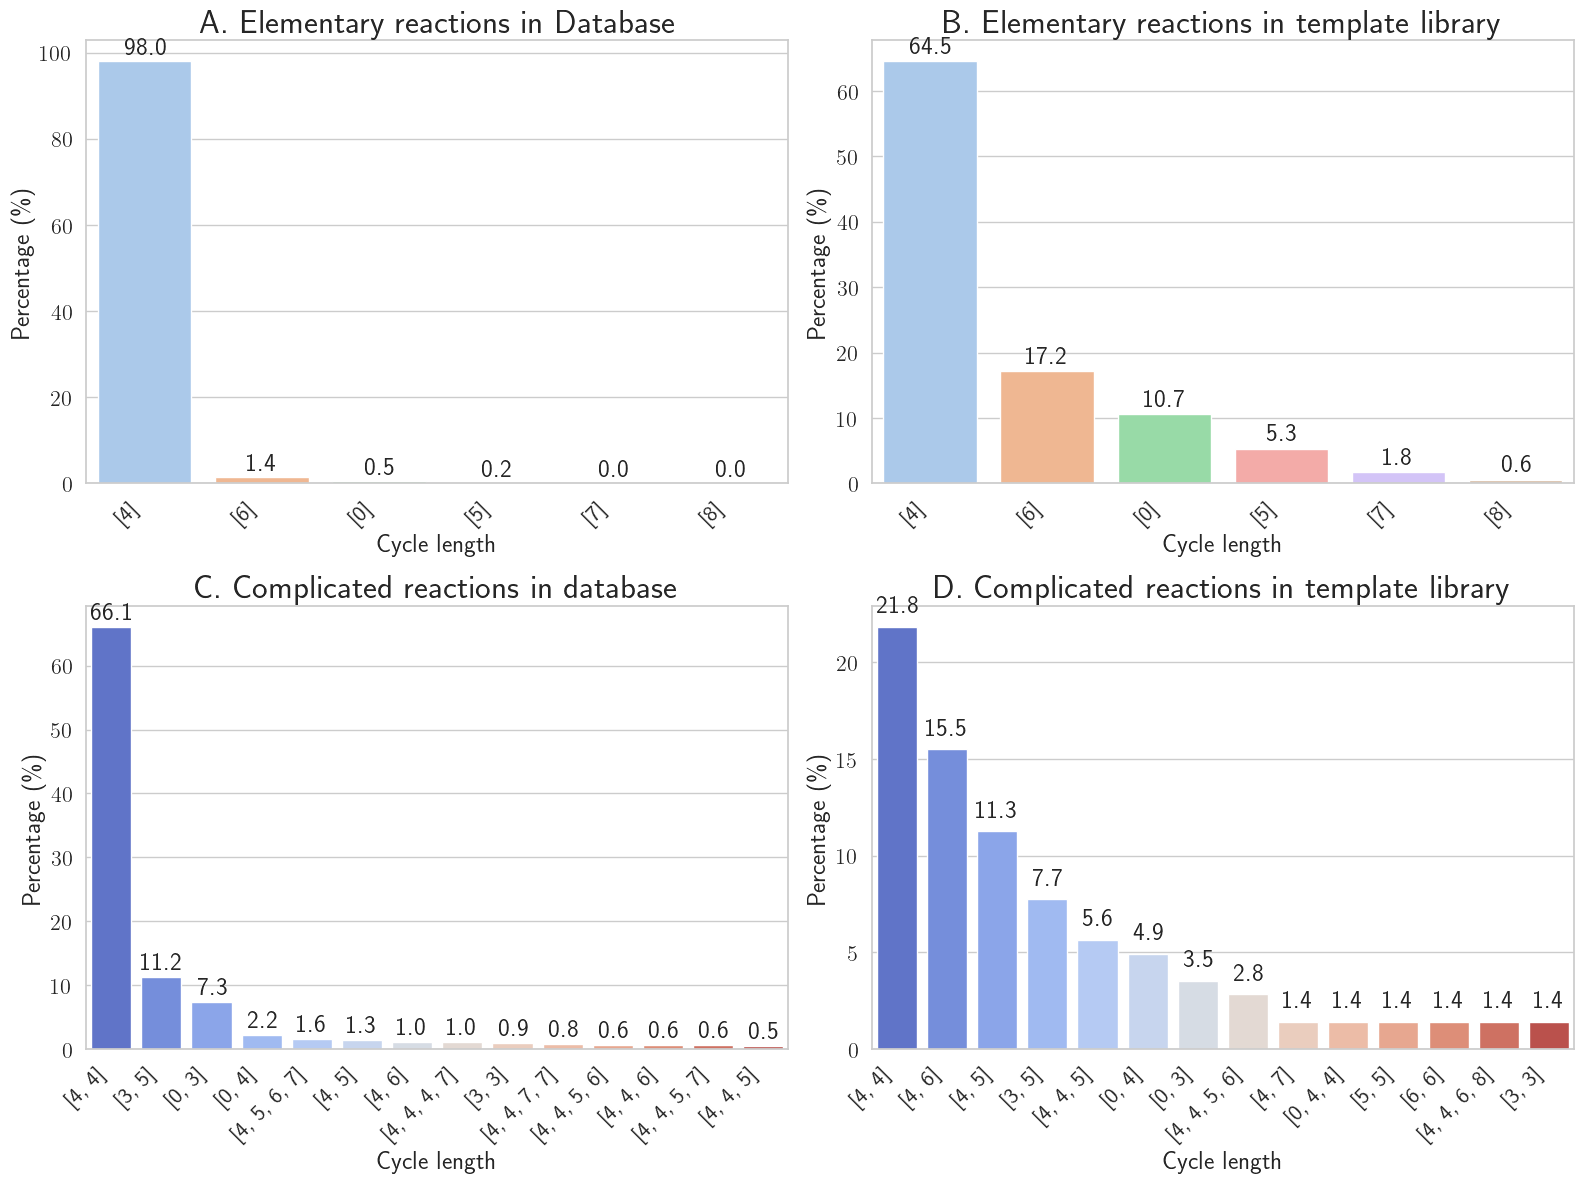

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


# Enable LaTeX rendering in matplotlib
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")  # Ensure amsmath is loaded
fig, axs = plt.subplots(2, 2, figsize=(16, 12))


plot_rules_distribution(
    element_count,
    ax=axs[0, 1],
    title=r"B. Elementary reactions in template library",
    color_pallet="pastel",
)
plot_rules_distribution(
    element_count_all,
    ax=axs[0, 0],
    title=r"A. Elementary reactions in Database",
    color_pallet="pastel",
)
plot_rules_distribution(
    complex_count,
    ax=axs[1, 1],
    title=r"D. Complicated reactions in template library",
    refinement=True,
    color_pallet="coolwarm",
)
plot_rules_distribution(
    complex_count_all,
    ax=axs[1, 0],
    title=r"C. Complicated reactions in database",
    refinement=True,
    color_pallet="coolwarm",
    threshold=0.3,
)


plt.tight_layout()
plt.savefig(
    "../../Docs/Analysis/fig/Fig9_rings_type.pdf", dpi=600, bbox_inches="tight", pad_inches=0
)
plt.show()

## Time Benchmark for Rule Clustering

In [34]:
data = [
    {
        "Type": "Hierarchical",
        "R0": f"{58.9 / 60:.2f}",
        "R1": f"{47.21 / 60:.2f}",
        "R2": f"{90.92 / 60:.2f}",
        "R3": f"{101.66 / 60:.2f}",
    },
    {
        "Type": "Empirical",
        "R0": f"{57.82 / 60:.2f}",
        "R1": f"{275.02 / 60:.2f}",
        "R2": f"{1807.58 / 60:.2f}",
        "R3": f"{5675.54 / 60:.2f}",
    },
]

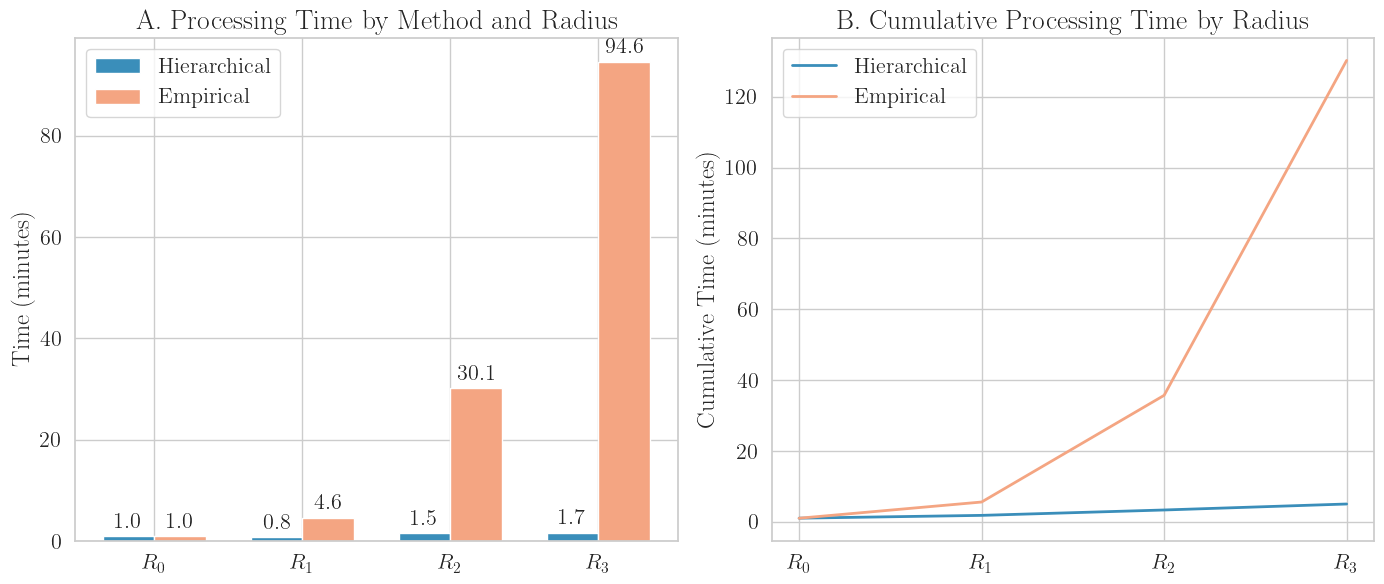

In [36]:
import matplotlib.pyplot as plt

plt.rc("text", usetex=True)  # Enable LaTeX rendering
plt.rc("font", family="serif")  # Optional: use serif font
from _analysis._plot_analysis import plot_bar_compare, plot_cumulative_line

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
radius = [0, 1, 2, 3]
hier = [58.9, 47.21, 90.92, 101.66]
hier = [round(value / 60, 2) for value in hier]
emp = [57.82, 275.02, 1807.58, 5675.54]
emp = [round(value / 60, 2) for value in emp]
# Plot on the first subplot for demonstration
plot_bar_compare(data, axes[0])
plot_cumulative_line(axes[1], radius, hier, emp)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(
    "../../Docs/Analysis/fig/FigA3_time_cluster.pdf",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

## Rule Composition

In [37]:
import sys

sys.path.append("../../")
from syntemp.pipeline import extract_its, rule_extract, write_gml

In [38]:
data = [
    {"R-id": "Alkyne-reduction", "rsmi": "[CH:1]#[CH:2].[H:3][H:4]>>[CH2:1]=[CH2:2]"},
    {"R-id": "Alkene-reduction", "rsmi": "[CH2:1]=[CH2:2].[H:3][H:4]>>[CH3:1]-[CH3:2]"},
]

In [39]:
its_correct, its_incorrect, all_uncertain_hydrogen = extract_its(
    data, mapper_types=["rsmi"], n_jobs=1
)

reaction_dicts, templates, hier_templates = rule_extract(
    its_correct,
)


gml_rules = write_gml(templates, None, "Cluster_id", "RC", True)

2024-09-16 15:05:34,509 - INFO - Extracting ITS graph with 1 CPUs.
2024-09-16 15:05:34,530 - INFO - Combine batch data.
2024-09-16 15:05:34,531 - INFO - Processing equivalent ITS correct
2024-09-16 15:05:34,532 - INFO - Processing unequivalent ITS correct
2024-09-16 15:05:34,533 - INFO - Processing ambiguous hydrogen-ITS
2024-09-16 15:05:34,534 - INFO - Number of correct mappers: 2
2024-09-16 15:05:34,534 - INFO - Number of incorrect mappers: 0
2024-09-16 15:05:34,535 - INFO - Number of uncertain hydrogen:0
2024-09-16 15:05:34,538 - INFO - Hierarchical clustering initialized successfully.
2024-09-16 15:05:34,540 - INFO - Processing with templates
2024-09-16 15:05:34,541 - INFO - Parent level
2024-09-16 15:05:34,544 - INFO - Child level with radius 1
2024-09-16 15:05:34,544 - INFO - Child level with radius 2
2024-09-16 15:05:34,545 - INFO - Child level with radius 3
2024-09-16 15:05:34,550 - INFO - Clustering completed and data extracted.
[Parallel(n_jobs=4)]: Using backend LokyBackend 

In [40]:
from syntemp.SynComp.rule_compose import RuleCompose
from mod import *

rule_0 = ruleGMLString(gml_rules[0][0])
rule_1 = ruleGMLString(gml_rules[0][1])

combo = RuleCompose._compose(rule_0, rule_1)

In [41]:
print(combo[0].getGMLString())

rule [
	ruleID "r_{4}"
	labelType "string"
	left [
		edge [ source 0 target 1 label "#" ]
		edge [ source 2 target 3 label "-" ]
		edge [ source 4 target 5 label "-" ]
	]
	context [
		node [ id 0 label "C" ]
		node [ id 1 label "C" ]
		node [ id 2 label "H" ]
		node [ id 3 label "H" ]
		node [ id 4 label "H" ]
		node [ id 5 label "H" ]
	]
	right [
		edge [ source 0 target 1 label "-" ]
		edge [ source 0 target 2 label "-" ]
		edge [ source 0 target 4 label "-" ]
		edge [ source 1 target 3 label "-" ]
		edge [ source 1 target 5 label "-" ]
	]
]


In [42]:
from syntemp.SynUtils.utils import load_from_pickle

complete = load_from_pickle("../../Data/Temp/Benchmark/Complete/templates.pkl.gz")
data_cluster = load_from_pickle(
    "../../Data/Temp/Benchmark/Complete/data_cluster.pkl.gz"
)

In [ ]:
temp_0 = complete[0]

In [ ]:
single = [value for value in temp_0 if value["Reaction Step"] == 1]
double = [value for value in temp_0 if value["Reaction Step"] == 2]
triple = [value for value in temp_0 if value["Reaction Step"] == 3]

In [ ]:
len(single)

In [ ]:
single_path = "../../Data/Temp/RuleComp/Single"
double_path = "../../Data/Temp/RuleComp/Double"

In [ ]:
from syntemp.pipeline import write_gml

In [ ]:
write_gml([double], double_path)

In [ ]:
write_gml([single], single_path)

In [ ]:
import glob

compose = []
for i in glob.glob("../../Data/Temp/RuleComp/Compose/*gml"):
    compose.append(i)

In [ ]:
len(compose)